In [ ]:
import pandas as pd
import os
pd.set_option('max_colwidth', 100)
import datetime
import mwapi
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
wmfdate_parser = lambda s: datetime.datetime.strptime(s, '%Y%m%d%H%M%S')
mw = mwapi.Session('https://fr.wikipedia.org')

Sending requests with default User-Agent.  Set 'user_agent' on mwapi.Session to quiet this message.


In [3]:
def get_bot_contribs(botname, start, end):
    ret_contribs = []
    continuation = 'start'
    while continuation is not None:
        q_params = dict(action='query', list='usercontribs', 
                        ucstart=start, ucend=end, ucuser=botname)
        if continuation != 'start':
            q_params['uccontinue'] = continuation['uccontinue']
        q_res = mw.get(**q_params)
        continuation=q_res['continue'] if 'continue' in q_res else None
        contribs = q_res['query']['usercontribs']
        ret_contribs.extend(contribs)
    return ret_contribs    

In [35]:
# start = 20191028000000
# end = 20191027000000
start = 20191116000000
end = 20191115000000
contribs_l = get_bot_contribs('Loveless', start, end)
contribs_b = get_bot_contribs('Loveless bienvenue', start, end)

In [36]:
len(contribs_l), len(contribs_b)

(556, 4295)

In [37]:
dfl = pd.DataFrame.from_records(contribs_l)
dfb = pd.DataFrame.from_records(contribs_b)

dfb_full = dfb.copy()

# Differences.
## Who did Loveless invite but not Loveless bienvenue?
## Who did Loveless bienvenue invite but not loveless?

In [38]:
def compare_title(t):
    ns_prefixes = ['Discussion utilisatrice:', 'Discussion utilisateur:']
    for prefix in ns_prefixes:
        if t.startswith(prefix):
            page_name = t.split(prefix)[1]
    if page_name.startswith('Loveless bienvenue/draft/'):
        page_name = page_name.split('Loveless bienvenue/draft/')[1]
    return page_name

In [39]:
dfl['compare_title'] = dfl['title'].apply(compare_title)
dfb['compare_title'] = dfb['title'].apply(compare_title)

In [40]:
dfl=dfl[['user','compare_title','timestamp']]
dfb=dfb[['user','compare_title','timestamp']]

In [41]:
dfl.groupby('compare_title').size().max()

1

In [42]:
dfb.groupby('compare_title').size().max()

1

In [43]:
l = dfl.set_index('compare_title')

In [44]:
b = dfb.set_index('compare_title')

In [45]:
j = l.join(b, how='outer', lsuffix='_l', rsuffix='_b')

In [46]:
overlap = j[(pd.notnull(j['user_l']))&(pd.notnull(j['user_b']))]
underlap_l_missing = j[(pd.isnull(j['user_l']))&(pd.notnull(j['user_b']))]
underlap_b_missing = j[(pd.notnull(j['user_l']))&(pd.isnull(j['user_b']))]

In [47]:
overlap

,user_l,timestamp_l,user_b,timestamp_b
compare_title,,,,
100%pursang,Loveless,2019-11-15T23:12:07Z,Loveless bienvenue,2019-11-15T23:11:05Z
123chiffre,Loveless,2019-11-15T17:09:08Z,Loveless bienvenue,2019-11-15T17:09:08Z
1984danyboy,Loveless,2019-11-15T18:45:07Z,Loveless bienvenue,2019-11-15T18:45:07Z
23Jacq,Loveless,2019-11-15T10:12:07Z,Loveless bienvenue,2019-11-15T10:13:05Z
3d-line FV,Loveless,2019-11-15T09:15:06Z,Loveless bienvenue,2019-11-15T09:15:06Z
5zrtz5,Loveless,2019-11-15T08:18:07Z,Loveless bienvenue,2019-11-15T08:19:06Z
A3SRcom,Loveless,2019-11-15T12:30:07Z,Loveless bienvenue,2019-11-15T12:31:06Z
ACMBREF,Loveless,2019-11-15T09:33:07Z,Loveless bienvenue,2019-11-15T09:35:04Z
AGABI ABDELMADJID,Loveless,2019-11-15T13:48:06Z,Loveless bienvenue,2019-11-15T13:49:05Z


In [48]:
underlap_l_missing

,user_l,timestamp_l,user_b,timestamp_b
compare_title,,,,
--unknowNNNNNNNNNNNNN--,NaN,NaN,Loveless bienvenue,2019-11-15T02:59:07Z
. burussama djoncky,NaN,NaN,Loveless bienvenue,2019-11-15T07:41:07Z
.oceane-baudry.,NaN,NaN,Loveless bienvenue,2019-11-15T06:56:07Z
04560414m,NaN,NaN,Loveless bienvenue,2019-11-15T00:32:07Z
0liveier,NaN,NaN,Loveless bienvenue,2019-11-15T13:27:08Z
100ga 100ga,NaN,NaN,Loveless bienvenue,2019-11-15T03:56:07Z
123456798980907e,NaN,NaN,Loveless bienvenue,2019-11-15T15:32:07Z
14700pipi,NaN,NaN,Loveless bienvenue,2019-11-15T14:16:07Z
24hvelo,NaN,NaN,Loveless bienvenue,2019-11-15T11:14:07Z


In [49]:
underlap_b_missing

,user_l,timestamp_l,user_b,timestamp_b
compare_title,,,,
Chadenline,Loveless,2019-11-15T06:54:06Z,NaN,NaN


# status
- Alexandrelau7 -- never existed in our database, have to look more into logs
- Francxshr/Archive 1 -- this is not a new user but template usage
- Manu911me -- never existed in our database, have to look more into logs
- Maximet26 -- userblocked [we wont invite a bloced user]
- Salixe  -- name change [understandable]


# Make sure users are getting invited within 3 minutes of registration

In [28]:
dfb_full.head()

,userid,user,pageid,revid,parentid,ns,title,timestamp,new,top,comment,size
0,3538808,Loveless bienvenue,12849339,163913539,0,3,Discussion utilisateur:Loveless bienvenue/draft/Chloé Favre,2019-10-27T23:59:05Z,,,Bienvenue !,1776
1,3538808,Loveless bienvenue,12849337,163913512,0,3,Discussion utilisateur:Loveless bienvenue/draft/MarcMonk,2019-10-27T23:57:04Z,,,Bienvenue !,1748
2,3538808,Loveless bienvenue,12849333,163913491,0,3,Discussion utilisateur:Loveless bienvenue/draft/Jakosmarto,2019-10-27T23:55:05Z,,,Bienvenue !,1748
3,3538808,Loveless bienvenue,12849324,163913378,0,3,Discussion utilisateur:Loveless bienvenue/draft/Levesquem,2019-10-27T23:47:05Z,,,Bienvenue !,1755
4,3538808,Loveless bienvenue,12849322,163913354,0,3,Discussion utilisateur:Loveless bienvenue/draft/Wackes Von Koenigshoffen,2019-10-27T23:45:04Z,,,Bienvenue !,1748


In [39]:
def get_registration_date(user):
    r=mw.get(action='query', list='users', usprop='registration', ususers=user)
    try:
        reg = r['query']['users'][0]['registration']
    except KeyError:
        reg = None
    return reg

In [40]:
dfb[:4]['compare_title'].apply(get_registration_date)

0    2019-10-27T23:56:07Z
1    2019-10-27T23:55:34Z
2    2019-10-27T23:53:52Z
3    2019-10-27T23:45:53Z
Name: compare_title, dtype: object

In [41]:
dfb['registration'] = dfb['compare_title'].apply(get_registration_date)

/home/paprika/.local/share/virtualenvs/experiment-action-controller-MJBx_Q7R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
dfb = dfb[pd.notnull(dfb['registration'])]

In [44]:
dfb['registration'] = dfb['registration'].apply(lambda t:datetime.datetime.fromisoformat(t[:-1]))

/home/paprika/.local/share/virtualenvs/experiment-action-controller-MJBx_Q7R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
dfb['welcome'] = dfb['timestamp'].apply(lambda t: datetime.datetime.fromisoformat(t[:-1]))

/home/paprika/.local/share/virtualenvs/experiment-action-controller-MJBx_Q7R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
dfb['welcome_lag'] =  dfb['welcome'] - dfb['registration']

/home/paprika/.local/share/virtualenvs/experiment-action-controller-MJBx_Q7R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
dfb['welcome_lag_seconds']=dfb['welcome_lag'].apply(lambda dt: dt.seconds)

/home/paprika/.local/share/virtualenvs/experiment-action-controller-MJBx_Q7R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
dfb['welcome_lag'].describe()

count                       873
mean     0 days 00:02:00.820160
std      0 days 00:00:33.583129
min             0 days 00:01:01
25%             0 days 00:01:32
50%             0 days 00:02:01
75%             0 days 00:02:30
max             0 days 00:03:04
Name: welcome_lag, dtype: object

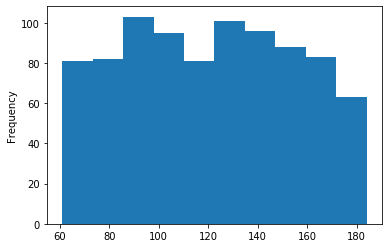

In [61]:
dfb['welcome_lag_seconds'].plot(kind='hist')